<a href="https://colab.research.google.com/github/Muhliscm/Course-era-captone/blob/master/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [3]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [4]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [5]:
ratings_df.shape

(463, 19)

In [6]:
ratings_df['students'].mean()

36.62419006479482

In [7]:
ratings_df['students'].median()

23.0

In [8]:
ratings_df['students'].min()

5

In [9]:
ratings_df['students'].max()

380

In [10]:
ratings_df.describe(include='all')

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463,463.000000,463,463,4.630000e+02,463.000000,463,463,463,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
unique,2,NaN,2,2,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,no,NaN,male,more,NaN,NaN,upper,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,399,NaN,268,436,NaN,NaN,306,435,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.365011,NaN,NaN,6.271140e-08,3.998272,NaN,NaN,NaN,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,NaN,9.802742,NaN,NaN,7.886477e-01,0.554866,NaN,NaN,NaN,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,NaN,29.000000,NaN,NaN,-1.450494e+00,2.100000,NaN,NaN,NaN,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,42.000000,NaN,NaN,-6.562689e-01,3.600000,NaN,NaN,NaN,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,NaN,48.000000,NaN,NaN,-6.801430e-02,4.000000,NaN,NaN,NaN,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,NaN,57.000000,NaN,NaN,5.456024e-01,4.400000,NaN,NaN,NaN,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000


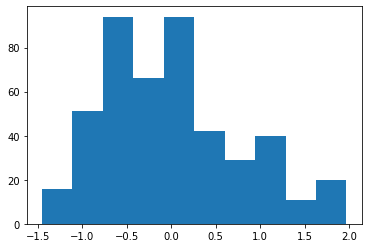

In [11]:
plt.hist(ratings_df['beauty'])
plt.show()

In [12]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [13]:
tenure_count = ratings_df.groupby('gender').agg({'tenure':'count'}).reset_index()

In [14]:
tenure_count['percentage'] = 100 * tenure_count.tenure/ tenure_count.tenure.sum()

In [15]:
tenure_count

,gender,tenure,percentage
0,female,195,42.116631
1,male,268,57.883369


In [16]:
minorites = ratings_df.groupby('gender').agg({'minority':'count'}).reset_index()

In [17]:
minorites['percentage'] = 100 * minorites.minority / minorites.minority.sum()

In [18]:
minorites

,gender,minority,percentage
0,female,195,42.116631
1,male,268,57.883369


In [19]:
tenure_count = ratings_df.groupby('minority').agg({'tenure':'count'}).reset_index()

In [20]:
tenure_count['percentage'] = 100 * tenure_count.tenure / tenure_count.tenure.sum()

In [21]:
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


In [22]:
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

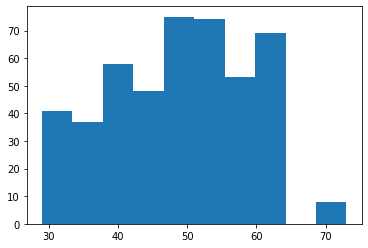

In [23]:
plt.hist(ratings_df['age'])

In [24]:
ratings_df.groupby('tenure').agg({'eval':'median'}).reset_index()

,tenure,eval
0,no,4.2
1,yes,4.0


In [25]:
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0

In [26]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

In [27]:
ratings_df.prof.nunique()

94

In [28]:
ratings_df['age'].mean()

48.365010799136066

In [29]:
ratings_df.age.std()

9.802742037864821

In [30]:
no_duplicates_rating_df = ratings_df.drop_duplicates(subset = ['prof'])
no_duplicates_rating_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [31]:
no_duplicates_rating_df['age'].mean()

47.5531914893617

In [32]:
no_duplicates_rating_df['age'].std()

10.25651329515495

In [33]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [34]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

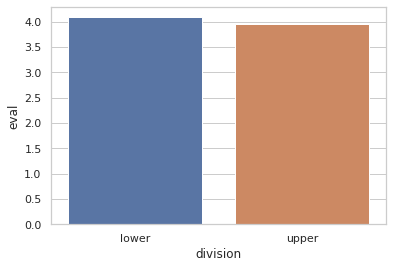

In [35]:
import seaborn as sns
sns.set(style = "whitegrid")
ax = sns.barplot(x='division', y = 'eval', data = division_eval)

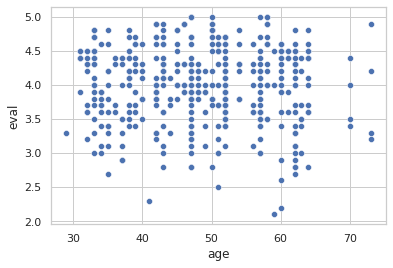

In [36]:
ax = sns.scatterplot(x= 'age', y = 'eval', data = ratings_df)

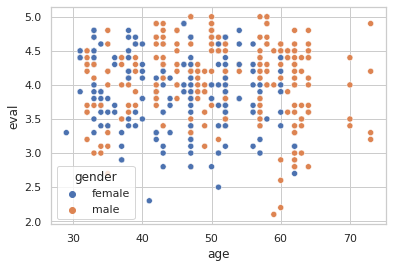

In [37]:
ax = sns.scatterplot(x = 'age', y = 'eval', hue = 'gender', data = ratings_df)

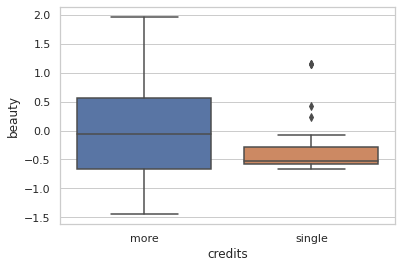

In [38]:
ax = sns.boxplot(x= 'credits', y='beauty', data = ratings_df)

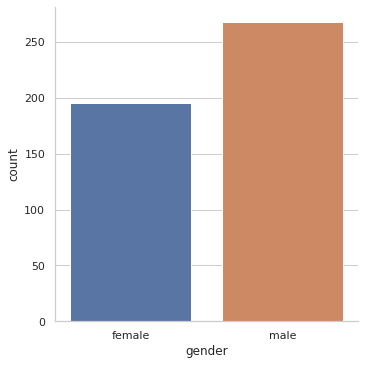

In [39]:
sns.catplot(x = 'gender', kind = 'count', data= ratings_df)

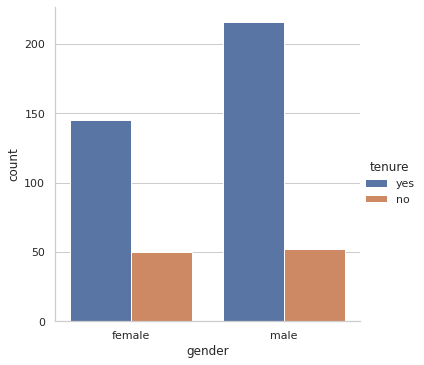

In [40]:
sns.catplot(x= 'gender', hue= 'tenure', kind= 'count', data= ratings_df)

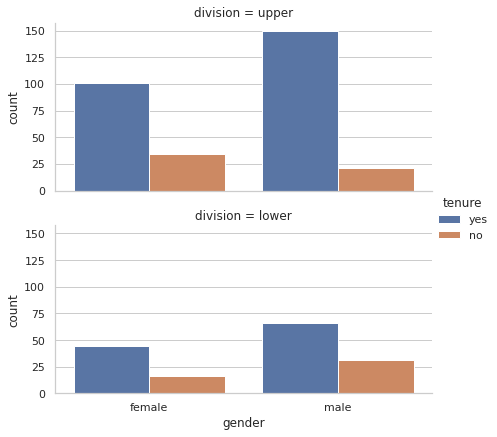

In [41]:
sns.catplot(x = 'gender', hue = 'tenure', row = 'division',
            kind = 'count', data = ratings_df, 
            height = 3, aspect = 2)

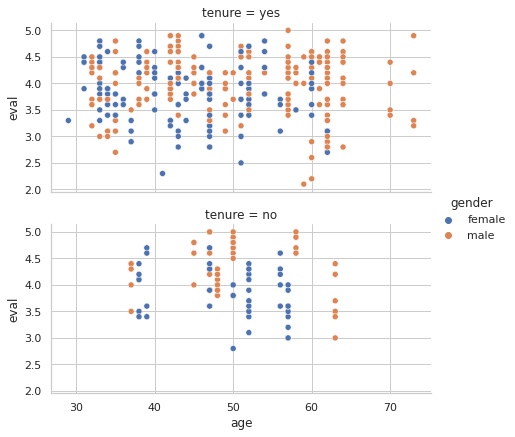

In [42]:
sns.relplot(x = 'age', y = 'eval', hue = 'gender', 
            row = 'tenure', 
            data = ratings_df, height = 3, aspect = 2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


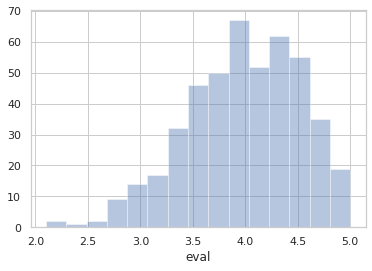

In [43]:
ax = sns.distplot(ratings_df['eval'], kde= False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


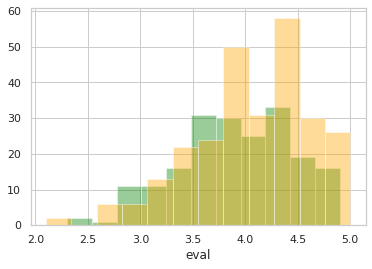

In [44]:
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color = 'green', kde = False)
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color = 'orange', kde = False)


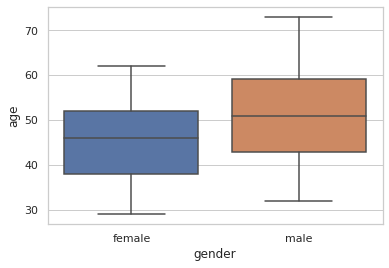

In [45]:
ax = sns.boxplot(x = 'gender', y = 'age', data = ratings_df)

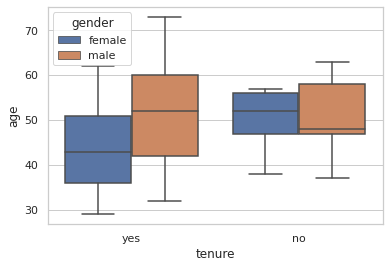

In [46]:
ax = sns.boxplot(x = 'tenure', y = 'age', hue = 'gender',
                 data = ratings_df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


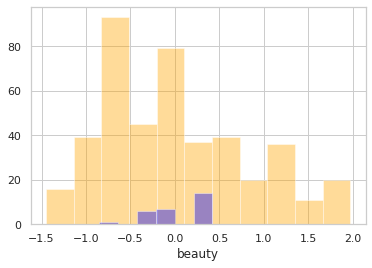

In [47]:
sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color = 'orange', kde = False)
sns.distplot(ratings_df[ratings_df['native'] == 'no']['beauty'], color = 'blue', kde = False)
plt.show()

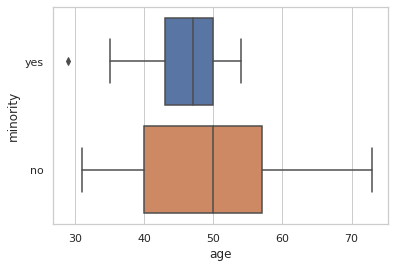

In [48]:
sns.boxplot(x = 'age', y = 'minority', data = ratings_df)

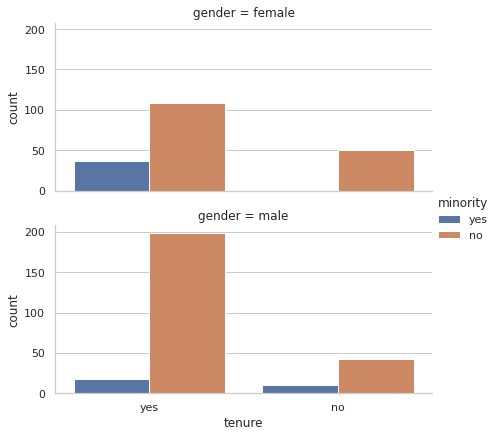

In [49]:
sns.catplot(x = 'tenure', hue = 'minority', row = 'gender',
            kind = 'count', data = ratings_df, 
            height = 3, aspect = 2)

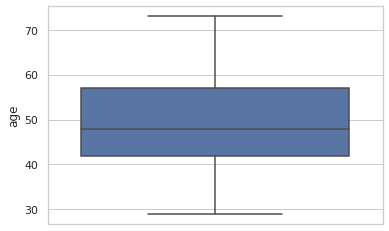

In [50]:
sns.boxplot(y= 'age', data = ratings_df)

###**Probability Distribution**

In [51]:
import scipy.stats
from math import sqrt

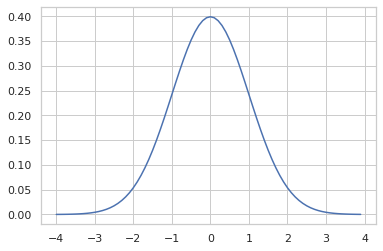

In [52]:
from scipy.stats import norm
x_axis = np.arange(-4, 4, .1)
# Mean = 0, sd = 1
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

In [53]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


In [54]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean) / eval_sd)
print(1 - prob0)

0.1828639734596742


In [55]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


In [56]:
x2 = 4.2
z = (x2 - eval_mean) / eval_sd
prob2 = scipy.stats.norm.cdf(z)
print(prob2)

0.642057540461896


In [57]:
round((prob2 - prob1)* 100, 1)

45.7

In [58]:
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

0.156

In [59]:
x = 3.3
z = (x - eval_mean) / eval_sd
prob_eval_3_3 = scipy.stats.norm.cdf(z) 

1 - prob_eval_3_3

0.8957422041794154

In [60]:
prob_2 = scipy.stats.norm.cdf((2 - eval_mean) / eval_sd)
print(prob_2)
prob_3 = scipy.stats.norm.cdf((3 - eval_mean) / eval_sd)
print(prob_3)

0.00015910859015753364
0.03607280250262359


In [61]:
round((prob_3 - prob_2)* 100, 1)

3.6

In [62]:
result = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
mean = np.mean(result)
std = np.std(result)

In [63]:
z = (mean - 100) / (std / sqrt(12))
round(1 - scipy.stats.norm.cdf(z), 3)

0.007

###**T test**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'freaqueny'), Text(0.5, 0, 'Normal Distribution')]

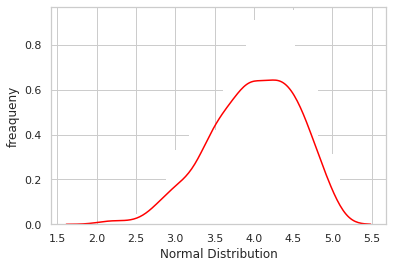

In [64]:
ax = sns.distplot(ratings_df['eval'],
                 bins = 20, 
                 kde = True, 
                 color = 'red',
                 hist_kws = {'linewidth': 15, 'alpha': 1})
ax.set(xlabel = 'Normal Distribution', ylabel= 'freaqueny')

In [65]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center = 'mean')

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

In [66]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                      ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

###**ANOVA**

In [67]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [68]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')

LeveneResult(statistic=8.60005668392585, pvalue=0.0002153661809934714)

In [69]:
sample1 = 9, 11, 10,11,10,12, 9,11,12, 9, 10
sample2 = 10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13

In [70]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
x = ratings_df['female']
y = ratings_df['eval']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 28 Dec 2020   Prob (F-statistic):            0.00124
Time:                        11:57:29   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40) & (ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [73]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


In [74]:
X = pd.get_dummies(ratings_df['age_group'])

In [75]:
y = ratings_df['beauty']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.32e-08
Time:                        11:57:29   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0138      0.028      0.496      0.620      -0.041       0.069
40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     5.98e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
X = ratings_df['beauty']
y = ratings_df['eval']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.25e-05
Time:                        11:57:29   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# T test quiz
Sample1 = 9, 11, 10,11,10,12, 9,11,12, 9, 10
Sample2 = 10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13

In [78]:
scipy.stats.levene(Sample1,
                   sample2,
                   center = 'mean')

LeveneResult(statistic=0.4776944334780897, pvalue=0.49741319152013475)

In [79]:
scipy.stats.ttest_ind(sample1,
                      sample2,
                      equal_var = True)

Ttest_indResult(statistic=-2.2164816032790386, pvalue=0.03841461541539729)